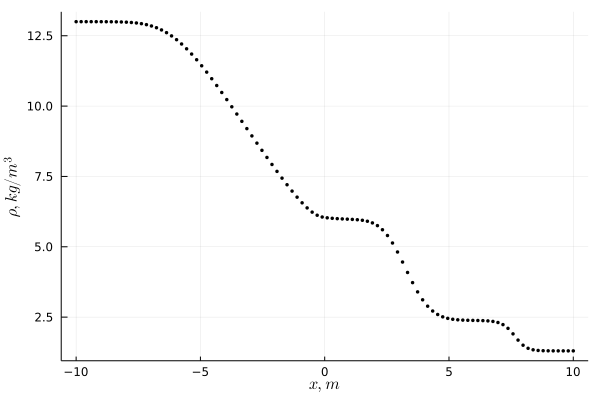

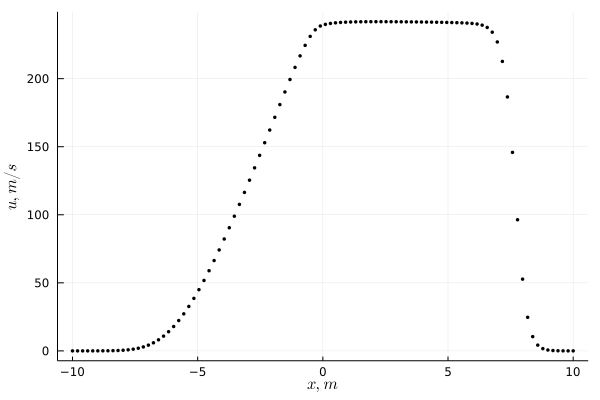

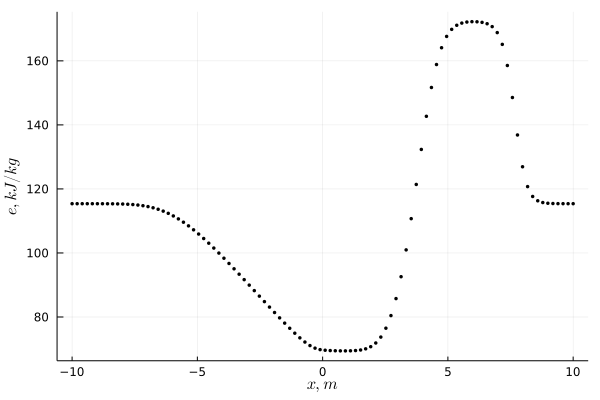

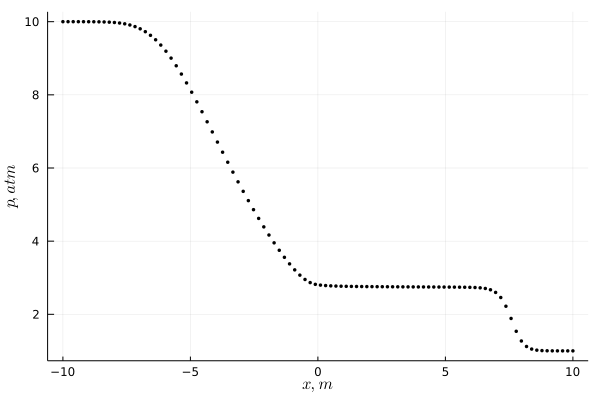

In [47]:
using Plots
using Polynomials
using LinearAlgebra
using LaTeXStrings

function calcA(v, e, y)
    A = zeros(Float64, (3, 3))
    A[1, 2] = 1
    A[2, 1] = -v^2
    A[2, 2] = 2*v
    A[2, 3] = y - 1
    A[3, 1] = -v*e*y
    A[3, 2] = e*y
    A[3, 3] = v
    
    return A
end

function calcLambda(v, e, y)
    Lambda = zeros(Float64, (3, 3))
    c = sqrt(y*(y-1)*e)
    Lambda[1, 1] = v + c
    Lambda[2, 2] = v
    Lambda[3, 3] = v - c
    
    return Lambda
end

function calcOmegaT(v, e, y) 
    Omega = zeros(Float64, (3, 3))
    c = sqrt(y*(y-1)*e)
    Omega[1, 1] = -v*c
    Omega[1, 2] = c
    Omega[1, 3] = y - 1
    Omega[2, 1] = -c^2
    Omega[2, 2] = 0
    Omega[2, 3] = y - 1
    Omega[3, 1] = v*c
    Omega[3, 2] = -c
    Omega[3, 3] = y - 1
    
    return Omega
end

function calcLambdaAbs(v, e, y) 
    LambdaAbs = zeros(Float64, (3, 3))
    c = sqrt(y*(y-1)*e)
    LambdaAbs[1, 1] = abs(v+c)
    LambdaAbs[2, 2] = abs(v)
    LambdaAbs[3, 3] = abs(v-c)
    
    return LambdaAbs
end

L = 10
gamma = 5/3
v_L = 0
ro_L = 13
P_L = 10*10^5
v_R = 0
ro_R = 1.3
P_R = 1*10^5
T = 0.02
tau = 10^(-4)
NX = 100
h = 2*L/(NX-1)
t_flag = 0.015

x = Vector(LinRange(-L, L, NX))

w = zeros(Float64, (3, NX))
v = zeros(Float64, (3, NX))
for i = 1:Integer(NX/2)
    w[1, i] = ro_L
    w[2, i] = ro_L * v_L
    w[3, i] = P_L/(gamma - 1)
    v[1, i] = ro_L
    v[2, i] = v_L
    v[3, i] = P_L/((gamma - 1)*ro_L)
end
for i = Integer(NX/2):NX
    w[1, i] = ro_R
    w[2, i] = ro_R*v_R
    w[3, i] = P_R/(gamma - 1)
    v[1, i] = ro_R
    v[2, i] = v_R
    v[3, i] = P_R/((gamma - 1)*ro_R)
end   


t = 0
while (t < T-tau)
    
    w_new = zeros(Float64, (3, NX))
    v_new = zeros(Float64, (3, NX))
    P = zeros(Float64, NX)
    for l = 2:(NX-1)
        w_new[:, l] = w[:, l] - tau*calcA(v[2, l], v[3, l], gamma)*(w[:, l+1] - w[:, l-1])/(2*h) + 
        tau*(inv(calcOmegaT(v[2, l], v[3, l], gamma))*calcLambdaAbs(v[2, l], v[3, l], gamma)*calcOmegaT(v[2, l], v[3, l], gamma))*
        (w[:, l+1] - 2*w[:, l] + w[:, l-1])/(2*h)
        v_new[1, l] = w_new[1, l]
        v_new[2, l] = w_new[2, l] / v_new[1, l]
        v_new[3, l] = w_new[3, l] / v_new[1, l]
        while tau/h*maximum(calcLambdaAbs(v[2, l], v[3, l], gamma)) > 1
            tau = tau/2
        end
        P[l] = (gamma - 1) * v[1, l] * v[3, l]
    end
    v_new[:, 1] = v_new[:, 2]
    v_new[:, NX] = v_new[:, NX-1]
    w_new[:, 1] = w_new[:, 2]
    w_new[:, NX] = w_new[:, NX-1]
    P[1] = P[2]
    P[NX] = P[NX - 1]
    
    t = round(t, digits = 10)
    if t == t_flag
        display(scatter(x, v[1, :], ylabel = L"$\rho, kg/m^3$", xlabel = L"x, m", color = "black", markersize = 2, label = ""))
        display(scatter(x, v[2, :], xlabel = L"x, m", ylabel = L"u, m/s", color = "black", markersize = 2, label = ""))
        display(scatter(x, v[3, :]/10^3, xlabel = L"x, m", ylabel = L"e, kJ/kg", color = "black", markersize = 2, label = ""))
        display(scatter(x, P/10^5, xlabel = L"x, m", ylabel = L"p, atm", color = "black", markersize = 2, label = ""))
    end

    w = w_new
    v = v_new
    t = t + tau
end    
